In [1]:
# Standard package imports
from pathlib import Path

# Third party packages imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Construct File Path for any OS

In [3]:
root_dir = Path().cwd().parent
data_folder = root_dir/"data"

### Read in Raw CSV data file and perform initial clean

In [4]:
df = pd.read_csv(data_folder/"raw"/"Emissions_Totals_E_Americas_NOFLAG.csv", encoding="latin-1")
df = df.drop(['Area Code','Area Code (M49)','Item Code','Element Code','Source Code', 'Source', 'Unit'], axis=1)
df = df.loc[:,~df.columns.str.startswith(('Y196','Y197','Y198','Y203','Y205'))]
df.head()

,Area,Item,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Anguilla,Drained organic soils,Emissions (CO2eq) (AR5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Anguilla,Drained organic soils (CO2),Emissions (CO2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anguilla,Drained organic soils (CO2),Emissions (CO2eq) (AR5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anguilla,Drained organic soils (N2O),Emissions (N2O),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anguilla,Drained organic soils (N2O),Emissions (CO2eq) from N2O (AR5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_melted = df.melt(id_vars=["Area", "Item", "Element"], 
        var_name="Year", 
        value_name="Value (kilotonnes)")
df_melted.head()

,Area,Item,Element,Year,Value (kilotonnes)
0,Anguilla,Drained organic soils,Emissions (CO2eq) (AR5),Y1990,0.0
1,Anguilla,Drained organic soils (CO2),Emissions (CO2),Y1990,0.0
2,Anguilla,Drained organic soils (CO2),Emissions (CO2eq) (AR5),Y1990,0.0
3,Anguilla,Drained organic soils (N2O),Emissions (N2O),Y1990,0.0
4,Anguilla,Drained organic soils (N2O),Emissions (CO2eq) from N2O (AR5),Y1990,0.0


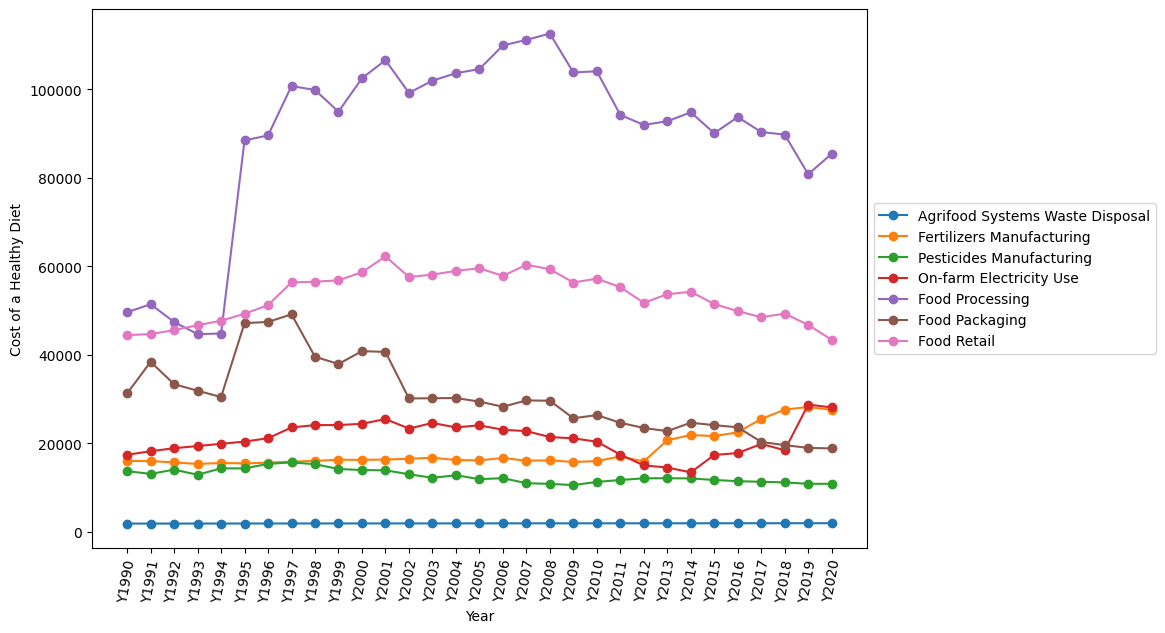

In [6]:
fig = plt.figure(figsize=(10,7))
df_co2 = df_melted[(df_melted["Element"] == "Emissions (CO2)") & (df_melted["Area"] == "United States of America")]
for i in df_co2["Item"].unique()[5:12]:
    df_country = df_co2[df_co2["Item"] == i]
    plt.plot(df_country["Year"], df_country["Value (kilotonnes)"],"o-",label=i)
plt.xlabel("Year")
plt.xticks(rotation=80)
plt.ylabel("Cost of a Healthy Diet")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))